# Is Your State Good Enough for your Mental Health ?- Intermediate Progress

*Project Members : Akshay Oza (aoza) and Mansi Panchmia (mpancham)*

*Data Science and Big Data: Fall 2020*

**This file contains code for pre-processing and one data visualisation - a python animation exploring our first of three primary questions. Three datasets are pre-processed - one primary CDC mental health data and two complementary datasets - well-being index of individual states and access to mental health across states - both scraped from pdf files**

**First part of the notebook focusses on data pre-processing and second part focusses on data exploration using visualisation.**


# Part 1 - Preprocessing

## CDC Mental Health Data

**Primary dataset - CDC Mental Health Data initially containing 9615 rows and 35 columns. Reason for deleting any column is listed as a comment alongside code.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("U.S._Chronic_Disease_Indicators__Mental_Health.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2009,2011,SC,South Carolina,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(33.998821303000454, -81.04537120699968)",NaN,45,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2009,2011,PR,Puerto Rico,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(18.220833, -66.590149)",NaN,72,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2009,2011,GU,Guam,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(13.444304, 144.793731)",NaN,66,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2009,2011,MA,Massachusetts,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(42.27687047000046, -72.08269067499964)",NaN,25,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2009,2011,IN,Indiana,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(39.766910452000445, -86.14996019399968)",NaN,18,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,2015,2015,MO,Missouri,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,18.9,18.9,NaN,NaN,15.7,22.6,Overall,Overall,NaN,NaN,NaN,NaN,"(38.635790776000476, -92.56630005299968)",NaN,29,MTH,MTH2_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
9611,2015,2015,RI,Rhode Island,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Age-adjusted Mean,4.2,4.2,NaN,NaN,3.8,4.6,Race/Ethnicity,"White, non-Hispanic",NaN,NaN,NaN,NaN,"(41.70828019300046, -71.52247031399963)",NaN,44,MTH,MTH1_0,AGEADJMEAN,RACE,WHT,NaN,NaN,NaN,NaN
9612,2015,2015,AR,Arkansas,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Age-adjusted Mean,5.0,5.0,NaN,NaN,3.8,6.2,Race/Ethnicity,"Black, non-Hispanic",NaN,NaN,NaN,NaN,"(34.74865012400045, -92.27449074299966)",NaN,5,MTH,MTH1_0,AGEADJMEAN,RACE,BLK,NaN,NaN,NaN,NaN
9613,2015,2015,HI,Hawaii,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Age-adjusted Mean,2.2,2.2,NaN,NaN,1.9,2.6,Race/Ethnicity,"Other, non-Hispanic",NaN,NaN,NaN,NaN,"(21.304850435000446, -157.85774940299973)",NaN,15,MTH,MTH1_0,AGEADJMEAN,RACE,OTH,NaN,NaN,NaN,NaN


In [4]:
del df['DataSource']  ## Not relevant to our analysis

In [5]:
del df['Response']  ## Not relevant to our analysis
del df['DataValueUnit']  ## Not relevant to our analysis

In [6]:
del df['DataValueFootnoteSymbol'] ## Not relevant to our analysis
del df['DatavalueFootnote'] ## Not relevant to our analysis
del df['DataValueAlt'] ## Same as 'DataValue'
del df['Topic'] ## All values 'Mental Health'
del df['StratificationCategory2'] ## All nan values
del df['Stratification2'] ## All nan values
del df['StratificationCategory3'] ## All nan values
del df['ResponseID'] ## All nan values
del df['TopicID'] ## All topic IDS - mental health; probably this dataset was filtered from a bigger table using this column
del df['Stratification3'] ## All nan values
## Deleting IDs of the deleted rows
del df['StratificationID3']
del df['StratificationCategoryID3']
del df['StratificationCategoryID2']



In [7]:
del df['DataValueType'] ## meaning conveyed in 'DataValueTypeID'
del df['StratificationCategory1'] ## meaning conveyed in 'StratificationCategoryID1'

In [8]:
del df['StratificationID2']

In [9]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Question',
       'DataValue', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'Stratification1', 'GeoLocation', 'LocationID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [10]:
a = df['LocationID'].unique()
print(sorted(a))

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 59, 66, 72, 78]


**Creating new columns of gender and race by transposing the column of `Stratification1`**

In [11]:
pt=df.pivot_table(values='Stratification1',columns='StratificationCategoryID1', index=['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Question',
       'DataValue','GeoLocation', 'LocationID',
       'QuestionID', 'DataValueTypeID', 'LowConfidenceLimit', 'HighConfidenceLimit'], aggfunc='first')

In [12]:
pt = pt.reset_index()

In [13]:
pt['GENDER'].unique()

array([nan, 'Male', 'Female'], dtype=object)

In [14]:
pt['Question'].unique()

array(['Postpartum depressive symptoms',
       'At least 14 recent mentally unhealthy days among women aged 18-44 years',
       'Recent mentally unhealthy days among adults aged >= 18 years'],
      dtype=object)

**Three types of questions asked - postpartum depressive symptoms is deleted due to lack of sufficient data - data on this mental health concern not collected consistently in this dataset.** 

In [15]:
### Removing postpartum depressive symptoms due to lack of data
pt = pt[pt.Question != 'Postpartum depressive symptoms']

In [16]:
pt

StratificationCategoryID1,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,DataValue,GeoLocation,LocationID,QuestionID,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,GENDER,OVERALL,RACE
23,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,23.6,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,19.1,28.7,NaN,Overall,NaN
24,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,23.8,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,18.7,29.7,NaN,NaN,"White, non-Hispanic"
25,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,29.9,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,18.1,45.1,NaN,NaN,"Black, non-Hispanic"
26,2011,2011,AR,Arkansas,Recent mentally unhealthy days among adults ag...,3.7,"(34.74865012400045, -92.27449074299966)",5,MTH1_0,AGEADJMEAN,1.9,5.5,NaN,NaN,Hispanic
27,2011,2011,AR,Arkansas,Recent mentally unhealthy days among adults ag...,3.9,"(34.74865012400045, -92.27449074299966)",5,MTH1_0,MEAN,2.0,5.7,NaN,NaN,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,4.3,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,AGEADJMEAN,4.0,4.6,NaN,NaN,"White, non-Hispanic"
7474,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,4.5,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,MEAN,4.2,4.8,Female,NaN,NaN
7475,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,4.7,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,AGEADJMEAN,4.4,5.0,Female,NaN,NaN
7476,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,6.8,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,AGEADJMEAN,4.8,8.9,NaN,NaN,"Multiracial, non-Hispanic"


In [17]:
pt['GENDER'].unique()

array([nan, 'Male', 'Female'], dtype=object)

In [18]:
pt[pt.Question == 'At least 14 recent mentally unhealthy days among women aged 18-44 years']

StratificationCategoryID1,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,DataValue,GeoLocation,LocationID,QuestionID,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,GENDER,OVERALL,RACE
23,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,23.6,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,19.1,28.7,NaN,Overall,NaN
24,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,23.8,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,18.7,29.7,NaN,NaN,"White, non-Hispanic"
25,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,29.9,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,18.1,45.1,NaN,NaN,"Black, non-Hispanic"
42,2011,2011,CO,Colorado,At least 14 recent mentally unhealthy days amo...,12.0,"(38.843840757000464, -106.13361092099967)",8,MTH2_0,CRDPREV,8.1,17.3,NaN,NaN,Hispanic
43,2011,2011,CO,Colorado,At least 14 recent mentally unhealthy days amo...,13.7,"(38.843840757000464, -106.13361092099967)",8,MTH2_0,CRDPREV,11.8,15.9,NaN,Overall,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,2018,2018,VA,Virginia,At least 14 recent mentally unhealthy days amo...,9.9,"(37.54268067400045, -78.45789046299967)",51,MTH2_0,CRDPREV,6.6,14.4,NaN,NaN,Hispanic
7458,2018,2018,VA,Virginia,At least 14 recent mentally unhealthy days amo...,15.4,"(37.54268067400045, -78.45789046299967)",51,MTH2_0,CRDPREV,12.0,19.6,NaN,NaN,"Black, non-Hispanic"
7459,2018,2018,VA,Virginia,At least 14 recent mentally unhealthy days amo...,16.9,"(37.54268067400045, -78.45789046299967)",51,MTH2_0,CRDPREV,14.9,19.2,NaN,NaN,"White, non-Hispanic"
7460,2018,2018,VA,Virginia,At least 14 recent mentally unhealthy days amo...,17.4,"(37.54268067400045, -78.45789046299967)",51,MTH2_0,CRDPREV,15.2,19.9,NaN,Overall,NaN


In [19]:
pt.loc[pt.Question == 'At least 14 recent mentally unhealthy days among women aged 18-44 years', 'GENDER'] = "Female"

In [20]:
pt

StratificationCategoryID1,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,DataValue,GeoLocation,LocationID,QuestionID,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,GENDER,OVERALL,RACE
23,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,23.6,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,19.1,28.7,Female,Overall,NaN
24,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,23.8,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,18.7,29.7,Female,NaN,"White, non-Hispanic"
25,2011,2011,AR,Arkansas,At least 14 recent mentally unhealthy days amo...,29.9,"(34.74865012400045, -92.27449074299966)",5,MTH2_0,CRDPREV,18.1,45.1,Female,NaN,"Black, non-Hispanic"
26,2011,2011,AR,Arkansas,Recent mentally unhealthy days among adults ag...,3.7,"(34.74865012400045, -92.27449074299966)",5,MTH1_0,AGEADJMEAN,1.9,5.5,NaN,NaN,Hispanic
27,2011,2011,AR,Arkansas,Recent mentally unhealthy days among adults ag...,3.9,"(34.74865012400045, -92.27449074299966)",5,MTH1_0,MEAN,2.0,5.7,NaN,NaN,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7473,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,4.3,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,AGEADJMEAN,4.0,4.6,NaN,NaN,"White, non-Hispanic"
7474,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,4.5,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,MEAN,4.2,4.8,Female,NaN,NaN
7475,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,4.7,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,AGEADJMEAN,4.4,5.0,Female,NaN,NaN
7476,2018,2018,VA,Virginia,Recent mentally unhealthy days among adults ag...,6.8,"(37.54268067400045, -78.45789046299967)",51,MTH1_0,AGEADJMEAN,4.8,8.9,NaN,NaN,"Multiracial, non-Hispanic"


In [21]:
del pt['YearEnd']

In [22]:
pt['GENDER'].unique()

array(['Female', nan, 'Male'], dtype=object)

In [23]:
pt = pt.sort_values(by=['YearStart', 'LocationDesc'], ascending= [True, True])

**After exploring data for the second question, this question was realised to one, not have sufficient data collected over years; two, this question narrowed the age group for females and three, the third question had more data over years for all age demographics, categorized by gender and hence, this question was removed**

In [24]:
pt = pt[pt.Question != 'At least 14 recent mentally unhealthy days among women aged 18-44 years']

In [25]:
pt['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'Virgin Islands'], dtype=object)

### Ensuring correct datatypes for selected columns

In [26]:
pt.dtypes

StratificationCategoryID1
YearStart                int64
LocationAbbr            object
LocationDesc            object
Question                object
DataValue              float64
GeoLocation             object
LocationID               int64
QuestionID              object
DataValueTypeID         object
LowConfidenceLimit     float64
HighConfidenceLimit    float64
GENDER                  object
OVERALL                 object
RACE                    object
dtype: object

In [27]:
pt

StratificationCategoryID1,YearStart,LocationAbbr,LocationDesc,Question,DataValue,GeoLocation,LocationID,QuestionID,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,GENDER,OVERALL,RACE
460,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.1,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,AGEADJMEAN,3.7,4.6,Male,NaN,NaN
461,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.1,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,3.6,4.6,Male,NaN,NaN
462,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.6,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.3,5.0,NaN,NaN,"White, non-Hispanic"
463,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.8,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,AGEADJMEAN,4.4,5.2,NaN,NaN,"White, non-Hispanic"
464,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.8,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.5,5.1,NaN,Overall,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,2018,WY,Wyoming,Recent mentally unhealthy days among adults ag...,4.4,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,AGEADJMEAN,3.2,5.5,NaN,NaN,Hispanic
6924,2018,WY,Wyoming,Recent mentally unhealthy days among adults ag...,4.5,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,AGEADJMEAN,4.0,5.1,Female,NaN,NaN
6925,2018,WY,Wyoming,Recent mentally unhealthy days among adults ag...,4.9,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,MEAN,3.5,6.3,NaN,NaN,Hispanic
6926,2018,WY,Wyoming,Recent mentally unhealthy days among adults ag...,5.5,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,AGEADJMEAN,2.8,8.2,NaN,NaN,"Multiracial, non-Hispanic"


**Our cleaned primary dataset has 6008 rows with 14 columns.**

## Storing our preprocessed data as a CSV

## Preprocessing for Well-Being Index and Mental health America Ranking Data

The data for Well-Being Index and Mental Health America is available for 2015-2018 but is in the form of PDF reports. In order to convert this tabular data from PDFs to data frames we used `tabula` a Python library that reads the PDF table on a specified page and creates a data frame for each table. Since the reports had different format for different years we had to set different options in `tabula` and then further processing was done in Excel to format them in same format so that a big data frame for Well-Being Index (2015-2018) and MHA (2015-2018) could be formed. The major option changes are `stream`=True and `lattice`=True. When `stream` is True, tabula reads the table assuming that there are no border and it tries to scan the table in such a way that it can fit table border and extract the text. When `lattice` is True , tabula reads tables with pre-defined border. We have included a sample for how `tabula` was used to convert one well-being index report and one MHA report. 

The sample code for creating CSV files for tables from Well-Being Index 2018 report across states: 

The sample code for creating a CSV file for table from Mental Health America Ranking and People who did not get access to mental health care across states

After some formatting in Excel to make the structure of all CSV files similar we created the Well-Being DataFrame and MHA DataFrame . We will be using these DataFrames for finding correlation between unhealthy mental days and the external state factors (third question in our proposal)

### Well-Being Index DataFrame 2015-2018

In [28]:
wb_df1= pd.read_csv("wb_2015.csv")
wb_df2= pd.read_csv("wb_2016.csv")
wb_df3= pd.read_csv("wb_2017.csv")
wb_df4= pd.read_csv("wb_2018.csv")
wb_df= pd.concat([wb_df1,wb_df2,wb_df3,wb_df4])
print("There are %d rows and %d columns in the Final Well-Being Index DataFrame"%(wb_df.shape[0],wb_df.shape[1]))
wb_df.head()

There are 200 rows and 9 columns in the Final Well-Being Index DataFrame


,State_Num,State,Year,Well-Being Index,Purpose Rank,Social Rank,Financial Rank,Community Rank,Physical Rank
0,1,Alabama,2015,61.8,13,12,42,21,41
1,2,Alaska,2015,64.1,5,5,1,7,6
2,3,Arizona,2015,63.0,6,7,23,16,8
3,4,Arkansas,2015,60.9,25,49,38,23,47
4,5,California,2015,62.7,10,18,21,29,3


The Well-Being Index data is available for 50 states (All states except District of Columbia). While processing the only problem we found for this dataframe was that there was an extra space after every `State` string for the year 2018. To handle this we ran the following code:

In [29]:
wb_df['State']= wb_df['State'].apply(lambda x: x.rstrip(" "))
wb_df['State'].value_counts()

Ohio              4
Oklahoma          4
Hawaii            4
Tennessee         4
Virginia          4
Maine             4
New Jersey        4
California        4
South Dakota      4
Alaska            4
Colorado          4
Wyoming           4
Idaho             4
West Virginia     4
Illinois          4
Louisiana         4
Nebraska          4
Pennsylvania      4
Washington        4
Wisconsin         4
Texas             4
Utah              4
Iowa              4
South Carolina    4
New Hampshire     4
Montana           4
Kentucky          4
North Dakota      4
Oregon            4
Massachusetts     4
Nevada            4
Alabama           4
Michigan          4
Kansas            4
New Mexico        4
Georgia           4
New York          4
North Carolina    4
Florida           4
Vermont           4
Connecticut       4
Missouri          4
Arkansas          4
Delaware          4
Arizona           4
Minnesota         4
Indiana           4
Mississippi       4
Maryland          4
Rhode Island      4


### Mental Health America Ranking DataFrame 2015-2018

In [30]:
mha_df1= pd.read_csv("mha_2015.csv")
mha_df2= pd.read_csv("mha_2016.csv")
mha_df3= pd.read_csv("mha_2017.csv")
mha_df4= pd.read_csv("mha_2018.csv")
mha_df= pd.concat([mha_df1,mha_df2,mha_df3,mha_df4])
mha_df.dropna(axis=1,inplace=True)
mha_df.rename(columns={'%':'%withnoacess'},inplace=True)
print("There are %d rows and %d columns in the Final Well-Being Index DataFrame"%(mha_df.shape[0],mha_df.shape[1]))
mha_df.head()

There are 204 rows and 4 columns in the Final Well-Being Index DataFrame


,State,Year,Rank,%withnoacess
0,Vermont,2015,1,42.9
1,Massachusetts,2015,2,47.3
2,Virginia,2015,3,48.7
3,Nebraska,2015,4,49.0
4,Maine,2015,5,49.9


# Part 2: Initial Visualisation generated while exploring the primary dataset

In [31]:
import plotly.graph_objects as go

In [32]:
df = pt.copy()

In [33]:
df = df[df.DataValueTypeID != 'AGEADJMEAN']

In [34]:
df.head()

StratificationCategoryID1,YearStart,LocationAbbr,LocationDesc,Question,DataValue,GeoLocation,LocationID,QuestionID,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,GENDER,OVERALL,RACE
461,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.1,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,3.6,4.6,Male,NaN,NaN
462,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.6,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.3,5.0,NaN,NaN,"White, non-Hispanic"
464,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.8,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.5,5.1,NaN,Overall,NaN
467,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,5.0,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.4,5.7,NaN,NaN,"Black, non-Hispanic"
468,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,5.5,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,5.1,5.9,Female,NaN,NaN


**Adding 'datavalue' rows - numerour rows of reported instances with each row having an average number of unhealthy days, over each year and by each state.**

In [35]:
all_yrs = df.groupby(['YearStart','LocationDesc', 'LocationAbbr'])['DataValue'].sum()

In [36]:
all_yrs = all_yrs.reset_index()

In [37]:
all_yrs

,YearStart,LocationDesc,LocationAbbr,DataValue
0,2011,Alabama,AL,35.3
1,2011,Alaska,AK,24.7
2,2011,Arizona,AZ,28.3
3,2011,Arkansas,AR,43.9
4,2011,California,CA,33.6
...,...,...,...,...
420,2018,Virginia,VA,33.9
421,2018,Washington,WA,32.0
422,2018,West Virginia,WV,39.3
423,2018,Wisconsin,WI,37.8


In [38]:
all_yrs.DataValue.unique()

array([35.3, 24.7, 28.3, 43.9, 33.6, 31.7, 33.9, 24.2, 25.7, 37.7, 31.5,
       20.1, 21.8, 30.2, 33.7, 31.3, 25.7, 29.6, 36.4, 40.1, 32.1, 30.3,
       28.2, 36.3, 33.5, 30.9, 33.7, 28.6, 28.5, 34.4, 22.7, 27.8, 32.3,
       33. , 16.6, 26.8, 38.1, 27.7, 38.6, 14.9, 32.2, 37.6, 19.8, 19.2,
       32.4, 22. , 26. , 30.2, 40.3, 19. , 15.5,  9.6, 12. , 14. , 11.5,
       10.5, 10.8, 11. , 13.2,  8.7,  8.8, 11.4, 12.9,  9.1,  9.6, 14.8,
       12.2, 10.4, 11.3, 12.3,  9.2, 13.1, 12.1, 11.1, 12.3,  9.9, 11.7,
        8.3, 12.5, 12.6, 11.8, 10.9, 10.3, 13.4, 10.2, 28. , 22.8, 28.4,
       37.4, 30.7, 27.9, 29.7, 30.5, 22.9, 34.9, 26.6, 24.1, 20.8, 28.7,
       31.4, 35.7, 21.2, 27.8, 39.7, 27.2, 34.6, 31.2, 28.7, 25.5, 28.5,
       28.8, 26.3, 32.5, 28.6, 31.4, 32.4, 29.8, 14.5, 32.6, 37.3, 31.9,
       33.3, 17.7, 18.4, 27.6, 20.6, 38.3, 23.2, 37.8, 27.1, 25. , 25. ,
       32.7, 23.9, 24.5, 20.1, 30.4, 33.2, 26.5, 35.8, 26.3, 25.3, 25.9,
       37.3, 26.9, 21. , 31.8, 24.6, 16.4, 29.2, 30

In [39]:
all_yrs.dtypes

YearStart         int64
LocationDesc     object
LocationAbbr     object
DataValue       float64
dtype: object

**The code below was explored before the animation is introduced; our first step was to make a static map for one year.**

In [40]:
pt = df[df.YearStart == 2011]

In [41]:
pt

StratificationCategoryID1,YearStart,LocationAbbr,LocationDesc,Question,DataValue,GeoLocation,LocationID,QuestionID,DataValueTypeID,LowConfidenceLimit,HighConfidenceLimit,GENDER,OVERALL,RACE
461,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.1,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,3.6,4.6,Male,NaN,NaN
462,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.6,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.3,5.0,NaN,NaN,"White, non-Hispanic"
464,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,4.8,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.5,5.1,NaN,Overall,NaN
467,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,5.0,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,4.4,5.7,NaN,NaN,"Black, non-Hispanic"
468,2011,AL,Alabama,Recent mentally unhealthy days among adults ag...,5.5,"(32.84057112200048, -86.63186076199969)",1,MTH1_0,MEAN,5.1,5.9,Female,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2011,WY,Wyoming,Recent mentally unhealthy days among adults ag...,3.4,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,MEAN,3.1,3.7,NaN,NaN,"White, non-Hispanic"
433,2011,WY,Wyoming,Recent mentally unhealthy days among adults ag...,3.5,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,MEAN,3.2,3.8,NaN,Overall,NaN
436,2011,WY,Wyoming,Recent mentally unhealthy days among adults ag...,3.8,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,MEAN,2.8,4.9,NaN,NaN,Hispanic
437,2011,WY,Wyoming,Recent mentally unhealthy days among adults ag...,4.1,"(43.23554134300048, -108.10983035299967)",56,MTH1_0,MEAN,1.9,6.4,NaN,NaN,"Other, non-Hispanic"


In [42]:
pt.groupby(['LocationDesc', 'GeoLocation', 'LocationAbbr'])['DataValue'].sum()

LocationDesc          GeoLocation                                LocationAbbr
Alabama               (32.84057112200048, -86.63186076199969)    AL              35.3
Alaska                (64.84507995700051, -147.72205903599973)   AK              24.7
Arizona               (34.865970280000454, -111.76381127699972)  AZ              28.3
Arkansas              (34.74865012400045, -92.27449074299966)    AR              43.9
California            (37.63864012300047, -120.99999953799971)   CA              33.6
Colorado              (38.843840757000464, -106.13361092099967)  CO              31.7
Connecticut           (41.56266102000046, -72.64984095199964)    CT              33.9
Delaware              (39.008830667000495, -75.57774116799965)   DE              24.2
District of Columbia  (38.907192, -77.036871)                    DC              25.7
Florida               (28.932040377000476, -81.92896053899966)   FL              37.7
Georgia               (32.83968109300048, -83.62758034599966) 

In [43]:
g1 = pt.groupby(['LocationDesc', 'GeoLocation', 'LocationAbbr'])['DataValue'].sum()

In [44]:
g1 = g1.reset_index()

In [45]:
g1

,LocationDesc,GeoLocation,LocationAbbr,DataValue
0,Alabama,"(32.84057112200048, -86.63186076199969)",AL,35.3
1,Alaska,"(64.84507995700051, -147.72205903599973)",AK,24.7
2,Arizona,"(34.865970280000454, -111.76381127699972)",AZ,28.3
3,Arkansas,"(34.74865012400045, -92.27449074299966)",AR,43.9
4,California,"(37.63864012300047, -120.99999953799971)",CA,33.6
5,Colorado,"(38.843840757000464, -106.13361092099967)",CO,31.7
6,Connecticut,"(41.56266102000046, -72.64984095199964)",CT,33.9
7,Delaware,"(39.008830667000495, -75.57774116799965)",DE,24.2
8,District of Columbia,"(38.907192, -77.036871)",DC,25.7
9,Florida,"(28.932040377000476, -81.92896053899966)",FL,37.7


In [46]:
g1.dtypes

LocationDesc     object
GeoLocation      object
LocationAbbr     object
DataValue       float64
dtype: object

In [47]:
import plotly.offline as pyo
import plotly.io as pio
pio.renderers.default='notebook'

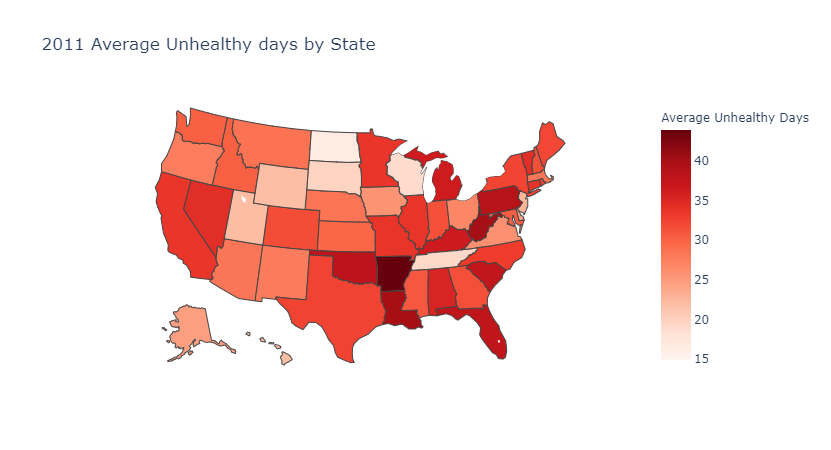

In [50]:
fig = go.Figure(data=go.Choropleth(
    locations= g1['LocationAbbr'], # Spatial coordinates
    z = g1['DataValue'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Average Unhealthy Days",
))

fig.update_layout(
    title_text = '2011 Average Unhealthy days by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show(renderer='jupyterlab')

**Opens an animation depicting total number of average unhealthy mental days reported each year from 2011 to 2018 for 50 states. If the mouse is hovered over any state in any year, the total number of days are reported alongisde state name. It is interesting to note here that in 2012, the reported number of unhealthy mental healthy has been lower than any other year in our data, across the country. The team is currently exploring the reason for this: is it that data was not reported correctly for that particular year or did something happen that resulted in less number of unhealthy mental days.** 

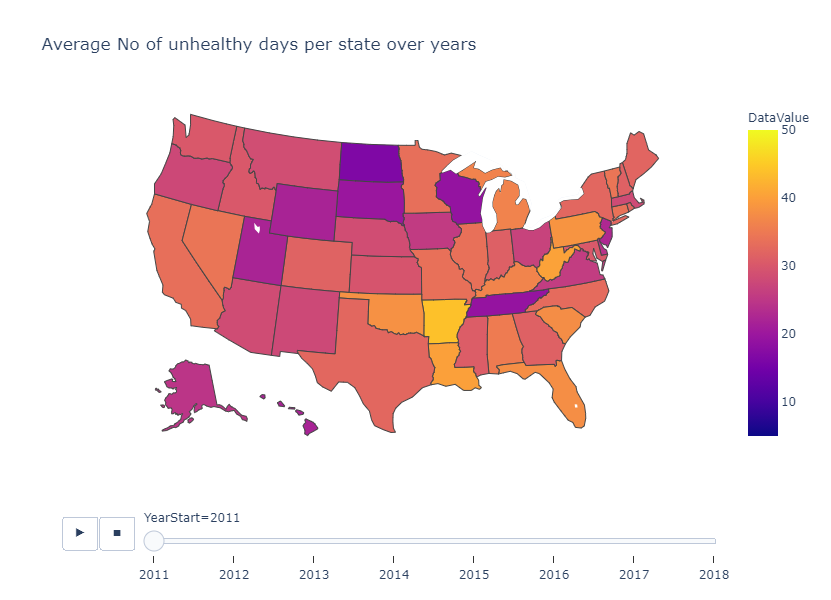

In [51]:
import plotly.express as px
fig = px.choropleth(all_yrs, 
              locations = 'LocationAbbr',
              color="DataValue", 
              animation_frame="YearStart",
              color_continuous_scale="Plasma",
              locationmode='USA-states',
              scope="usa",
              range_color=(5, 50),
              title='Average No of unhealthy days per state over years',
              height=600
             )
fig.show(renderer = 'jupyterlab')
#The animation might not work as it requires plotly widget and plotly extension for jupyter lab